In [1]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [2]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [3]:
import pandas as pd

from collections import Counter

import itertools

In [4]:
import sympy as sym

In [5]:
import os

In [6]:
os.chdir("/Users/glynatsi/rsc/reactive-two-bits/")

In [86]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

from main import *

In [87]:
eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from eq import *

In [88]:
colors = ["tab:orange", "tab:green", "tab:green"]

### Numerical Nash

In [192]:
import glob

In [193]:
files = glob.glob("data/two_bit_reactive/*csv")

In [194]:
len(files)

1000

In [195]:
columns = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + [f"q{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

In [196]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [197]:
# df = pd.read_csv("../two_bit_reactive_nash.csv", index_col=0)

In [198]:
df['ID'].nunique()

1000

In [199]:
eq, noneq = seperate_equilibria_and_non(df)

In [200]:
def conditition_one(p2, p4, b, c):
    return p4 < 1 - (c / b)

def conditition_two(p2, p4, b, c):
    return p2 < p4

def conditition_three(p3, b, c):
    return p3 < 1

def condition_four(p2, p4, b, c):
    return  1 + p2 < (b / c) + (p4 * (c - b)) / c

def nash_conditions(p, b, c):
    p1, p2, p3, p4 = p
    
    c1 = conditition_one(p2, p4, b, c)
    c2 = conditition_two(p2, p4, b, c)
    c3 = conditition_three(p3, b, c)
    c4 = condition_four(p2, p4, b, c)
    
    return {"c1": c1, "c2": c2, "c3": c3, "c4": c4}

In [213]:
for i, row in noneq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    check = nash_conditions(p, 2, 1)
    
    assert all(check.values()) == False

In [214]:

outside = 0
for i, row in eq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    check = all(nash_conditions(p, 2, 1).values())
    
    if check == False:
        outside += 1

In [217]:
outside / eq['ID'].nunique()

0.751503006012024

#### The pure set of strategies we need to check 

In [218]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [219]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [220]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [221]:
counter

Counter({'N0': 485,
 'N1': 418,
 'N2': 257,
 'N3': 242,
 'N4': 277,
 'N5': 247,
 'N6': 271,
 'N7': 288})

In [222]:
labels = [f"N{i}" for i in range(0, 16)]

In [223]:
labels = [f"N{i}" for i in range(0, 16)]

idx_sets = []

for i, j, k in list(itertools.combinations(labels, r=3)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s) and k not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j, k))

In [224]:
idx_sets

[('N0', 'N1', 'N6'),
 ('N0', 'N2', 'N6'),
 ('N0', 'N3', 'N6'),
 ('N0', 'N4', 'N6'),
 ('N0', 'N5', 'N6'),
 ('N0', 'N6', 'N7'),
 ('N0', 'N6', 'N8'),
 ('N0', 'N6', 'N9'),
 ('N0', 'N6', 'N10'),
 ('N0', 'N6', 'N11'),
 ('N0', 'N6', 'N12'),
 ('N0', 'N6', 'N13'),
 ('N0', 'N6', 'N14'),
 ('N0', 'N6', 'N15')]

Thus, N0 and N6 are enough to check for Nash.

In [225]:
N0 = [0, 0, 0, 0]
N6 = [0, 1, 1, 0]

In [226]:
def N0(p):
    return 2 * p[3] - 1

def N6(p):
    _, p2, p3, p4 = p
    return -(
        -(p2 ** 3) * p3 ** 3 * p4
        + 2 * p2 ** 3 * p3 ** 2 * p4
        - 2 * p2 ** 3 * p3 * p4
        + p2 ** 3 * p4
        + 2 * p2 ** 2 * p3 ** 4 * p4 ** 2
        - 2 * p2 ** 2 * p3 ** 4 * p4
        - 5 * p2 ** 2 * p3 ** 3 * p4 ** 2
        + 7 * p2 ** 2 * p3 ** 3 * p4
        + 7 * p2 ** 2 * p3 ** 2 * p4 ** 2
        - 12 * p2 ** 2 * p3 ** 2 * p4
        + p2 ** 2 * p3 ** 2
        - 7 * p2 ** 2 * p3 * p4 ** 2
        + 11 * p2 ** 2 * p3 * p4
        - 2 * p2 ** 2 * p3
        + 3 * p2 ** 2 * p4 ** 2
        - 4 * p2 ** 2 * p4
        + p2 ** 2
        - 4 * p2 * p3 ** 4 * p4 ** 3
        + 4 * p2 * p3 ** 4 * p4 ** 2
        + 13 * p2 * p3 ** 3 * p4 ** 3
        - 15 * p2 * p3 ** 3 * p4 ** 2
        + p2 * p3 ** 3 * p4
        - 16 * p2 * p3 ** 2 * p4 ** 3
        + 20 * p2 * p3 ** 2 * p4 ** 2
        - 2 * p2 * p3 ** 2
        + 12 * p2 * p3 * p4 ** 3
        - 18 * p2 * p3 * p4 ** 2
        + 3 * p2 * p3 * p4
        + 3 * p2 * p3
        - 3 * p2 * p4 ** 3
        + 5 * p2 * p4 ** 2
        - p2 * p4
        - p2
        + 2 * p3 ** 4 * p4 ** 4
        - 2 * p3 ** 4 * p4 ** 3
        - 7 * p3 ** 3 * p4 ** 4
        + 8 * p3 ** 3 * p4 ** 3
        - p3 ** 3 * p4 ** 2
        + 9 * p3 ** 2 * p4 ** 4
        - 13 * p3 ** 2 * p4 ** 3
        + 4 * p3 ** 2 * p4 ** 2
        - p3 ** 2 * p4
        + p3 ** 2
        - 7 * p3 * p4 ** 4
        + 13 * p3 * p4 ** 3
        - 6 * p3 * p4 ** 2
        + p3 * p4
        - p3
        + 3 * p4 ** 4
        - 9 * p4 ** 3
        + 9 * p4 ** 2
        - 3 * p4
    ) / (
        p2 ** 3 * p3 ** 3 * p4
        - 2 * p2 ** 3 * p3 ** 2 * p4
        + 2 * p2 ** 3 * p3 * p4
        - p2 ** 3 * p4
        + 2 * p2 ** 2 * p3 ** 4 * p4 ** 2
        - 2 * p2 ** 2 * p3 ** 4 * p4
        - 11 * p2 ** 2 * p3 ** 3 * p4 ** 2
        + 9 * p2 ** 2 * p3 ** 3 * p4
        + 19 * p2 ** 2 * p3 ** 2 * p4 ** 2
        - 16 * p2 ** 2 * p3 ** 2 * p4
        + p2 ** 2 * p3 ** 2
        - 17 * p2 ** 2 * p3 * p4 ** 2
        + 17 * p2 ** 2 * p3 * p4
        - 2 * p2 ** 2 * p3
        + 7 * p2 ** 2 * p4 ** 2
        - 8 * p2 ** 2 * p4
        + p2 ** 2
        - 4 * p2 * p3 ** 4 * p4 ** 3
        + 4 * p2 * p3 ** 4 * p4 ** 2
        + 19 * p2 * p3 ** 3 * p4 ** 3
        - 17 * p2 * p3 ** 3 * p4 ** 2
        - p2 * p3 ** 3 * p4
        - 28 * p2 * p3 ** 2 * p4 ** 3
        + 24 * p2 * p3 ** 2 * p4 ** 2
        + 4 * p2 * p3 ** 2 * p4
        - 2 * p2 * p3 ** 2
        + 20 * p2 * p3 * p4 ** 3
        - 24 * p2 * p3 * p4 ** 2
        + p2 * p3 * p4
        + 3 * p2 * p3
        - 5 * p2 * p4 ** 3
        + 9 * p2 * p4 ** 2
        - 3 * p2 * p4
        - p2
        + 2 * p3 ** 4 * p4 ** 4
        - 2 * p3 ** 4 * p4 ** 3
        - 9 * p3 ** 3 * p4 ** 4
        + 8 * p3 ** 3 * p4 ** 3
        + p3 ** 3 * p4 ** 2
        + 13 * p3 ** 2 * p4 ** 4
        - 13 * p3 ** 2 * p4 ** 3
        - p3 ** 2 * p4
        + p3 ** 2
        - 9 * p3 * p4 ** 4
        + 13 * p3 * p4 ** 3
        - 3 * p3 * p4
        - p3
        + 3 * p4 ** 4
        - 9 * p4 ** 3
        + 9 * p4 ** 2
        - 3 * p4
    )


def N931(p, b, c):
    _, p_2, p_3, p_4 = p
    
    return (
    2 * p_2 ** 2 * p_3 ** 2 * p_4
    - 2 * p_2 ** 2 * p_3 * p_4
    - 2 * p_2 * p_3 ** 2 * p_4 ** 2
    - 2 * p_2 * p_3 ** 2 * p_4
    + 3 * p_2 * p_3 * p_4 ** 2
    + 2 * p_2 * p_3 * p_4
    + p_2 * p_3
    - 2 * p_2 * p_4 ** 2
    + 2 * p_2 * p_4
    - 2 * p_2
    + 2 * p_3 ** 2 * p_4 ** 2
    + p_3 * p_4 ** 3
    - 8 * p_3 * p_4 ** 2
    + 7 * p_3 * p_4
    - 2 * p_3
    - p_4 ** 3
    + 4 * p_4 ** 2
    - 3 * p_4
) / (
    p_2 ** 2 * p_3 ** 2
    - p_2 ** 2 * p_3
    - p_2 * p_3 ** 2 * p_4
    - p_2 * p_3 ** 2
    + p_2 * p_3 * p_4 ** 2
    - p_2 * p_3 * p_4
    + 3 * p_2 * p_3
    - p_2
    + p_3 ** 2 * p_4
    - p_3 * p_4 ** 3
    + 3 * p_3 * p_4 ** 2
    - 5 * p_3 * p_4
    + 2 * p_3
    + p_4 ** 3
    - 6 * p_4 ** 2
    + 10 * p_4
    - 5
) - (2 - 1)



In [227]:
x = np.arange(0, 1 - 10 ** -5, 0.01)
y = np.arange(0, 1 - 10 ** -5, 0.01)
z = np.arange(0, 1 - 10 ** -5, 0.01)

xv, yv, zv = np.meshgrid(x, y, z)

In [228]:
Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 3))
Is6, Js6, Zs6 = np.where(np.isclose(N6((1, xv, yv, zv)), 0, atol=10 ** - 3))

<ipython-input-226-7bc8e8c5f1ff>:6: RuntimeWarning: invalid value encountered in true_divide
  return -(


In [229]:
Is931, Js931, Zs931 = np.where(np.isclose(N931((1, xv, yv, zv), 2, 1), 0, atol=10 ** - 3))

### Results on Good Nash - Two bit reactive

In [230]:
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55)]

In [231]:
color = '#FDF6E3'

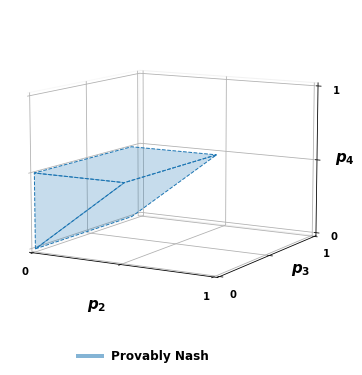

In [232]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
axes = [ax1]

    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:blue', alpha=.25))
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15,)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15,)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False


l = ax1.legend(custom_lines[:1], 
           ['Provably Nash'], loc=(.2, -.1),  framealpha=0, fontsize=12);

# for text in l.get_texts():
#     text.set_color(color)

# plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/one.png", 
#             transparent=True,  bbox_inches='tight',  dpi=300)

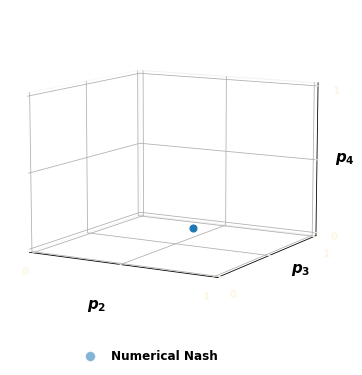

In [233]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
axes = [ax1]

ax1.scatter(0.6, 0.5, 0.1, color='tab:blue', s=50)


for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15,)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15,)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False



ax1.tick_params(axis='x', colors=color)
ax1.tick_params(axis='y', colors=color)
ax1.tick_params(axis='z', colors=color)

l = ax1.legend(custom_lines[1:2], 
           ['Numerical Nash'], loc=(.2, -.1),  framealpha=0, fontsize=12);
    

# plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/two.png", 
#             transparent=True,  bbox_inches='tight',  dpi=300)

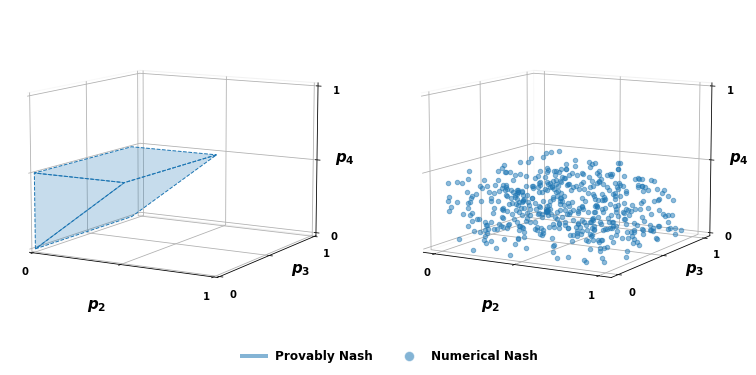

In [236]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:blue', alpha=.25))

for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates()[:1000].iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);

    
# for k, indices in enumerate([[Is0, Js0, Zs0], 
#                              [Is6, Js6, Zs6]]):
    
#         Is, Js, Zs = indices
        
#         for i, j, z in zip(Is, Js, Zs):
            
#             ax3.scatter(xv[i, j, z],
#                             yv[i, j, z],
#                             zv[i, j, z],
#                             s=1,
#                             color=colors[k])
            
#         ax3.scatter(xv[i, j, z],
#                 yv[i, j, z],
#                 zv[i, j, z],
#                 s=1,
# #                 label=labels[k],
#                 color=colors[k])
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    
ax2.legend(custom_lines[:2], ['Provably Nash',
                          'Numerical Nash',
                          'AllD', 'N6'], loc=(-.5, -.1), ncol=4, framealpha=0, fontsize=12);

plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/three.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

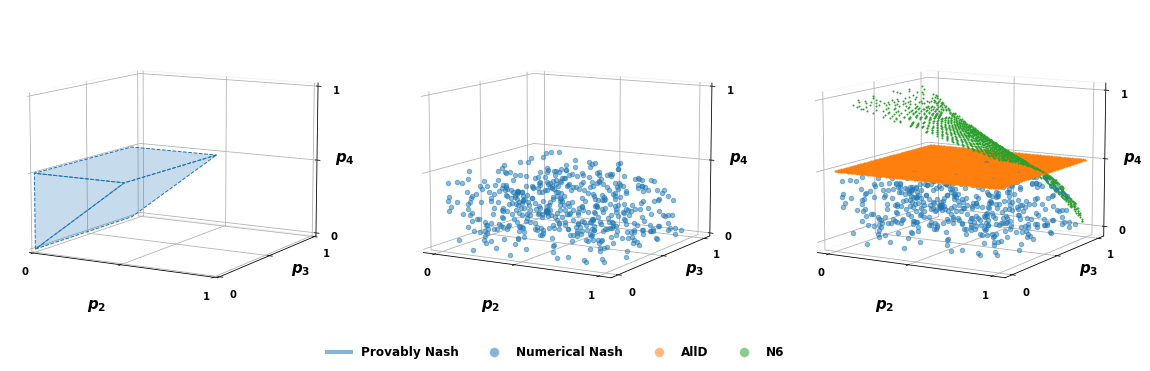

In [237]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:blue', alpha=.25))
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates()[:1000].iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        ax3.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);

    
for k, indices in enumerate([[Is0, Js0, Zs0], 
                             [Is6, Js6, Zs6]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax3.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax3.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
#                 label=labels[k],
                color=colors[k])
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

# ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax3.legend(custom_lines, ['Provably Nash',
                          'Numerical Nash',
                          'AllD', 'N6'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


# plt.savefig("../static/results_two_bit.pdf", bbox_inches='tight')

plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/four.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

In [238]:
files = glob.glob("data/two_bit_against_memory_two/*.csv")

In [239]:
columns2 = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

In [240]:
dfs = [pd.read_csv(file, index_col=0, names=columns2) for file in files]

In [241]:
df2 = pd.concat(dfs)

In [242]:
df2['ID'].nunique()

1000

In [243]:
eq_memone, noneq_memone = seperate_equilibria_and_non(df2)

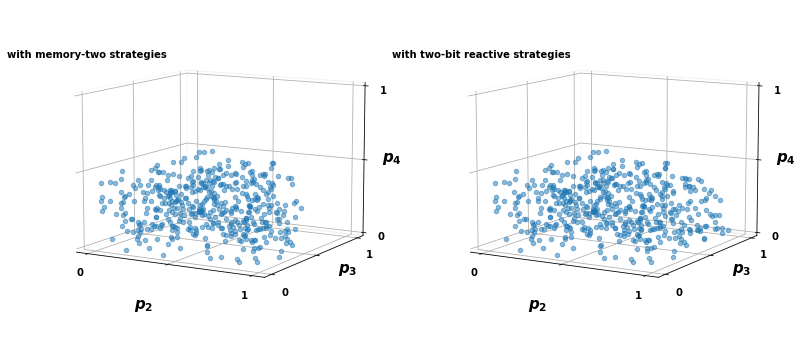

In [248]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("with memory-two strategies", fontweight='bold', x=.1, y=.9, fontsize=10)

ax2.set_title("with two-bit reactive strategies", fontweight='bold', x=.1, y=.9, fontsize=10)


plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/five.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

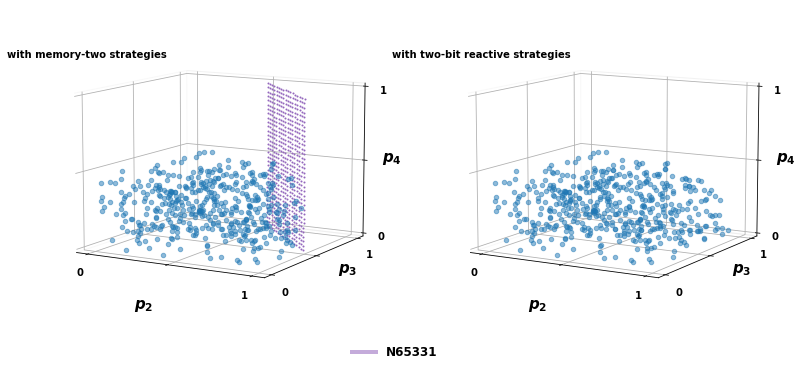

In [258]:
custom_lines = [Line2D([0], [0], color='tab:purple', lw=4, alpha=.55)]

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("with memory-two strategies", fontweight='bold', x=.1, y=.9, fontsize=10)

ax2.set_title("with two-bit reactive strategies", fontweight='bold', x=.1, y=.9, fontsize=10)


for point in data:
     ax1.scatter(point[0],
                 point[1],
                 point[2],
                 s=1,
                 color='tab:purple')
        
    
ax2.legend(custom_lines, ['N65331'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/six.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

In [267]:
def nash_conditions_mem_two(p, b, c):
    c1  = p[1] < p[5]
    c2  = p[9] < p[5]
    c3  = p[13] < p[5]
    c4  = p[4] < 1
    c5  = p[8] < 1
    c6  = p[12] < 1
    c7  = (c / b) * p[2] < 1 - p[5]
    c8  = (c / b) * p[10] < 1 - p[5]
    c9  = (c / b) * p[14] < 1 - p[5]
    c12 = (c / b) * p[6] < 1 - p[5]
    c10 = 1 + (c / (b - c)) * p[11] > p[5]
    c11 = 1 + (c / (b - c)) * p[15] > p[5]
    c13 = (c / (b - c)) * p[7] < 1 - p[5]
    c14 = 1 + (c / (b - c)) * p[3] > p[5]
    
    return  {
"c1" : c1 ,
"c2" : c2 ,
"c3" : c3 ,
"c4" : c4 ,
"c5" : c5 ,
"c6" : c6 ,
"c7" : c7 ,
"c8" : c8 ,
"c9" : c9 ,
"c12" : c12,
"c10" : c10,
"c11" : c11,
"c13" : c13,
"c14" : c14,
}
    

In [313]:
files = glob.glob("ada/memory_two_against_memory_two/*.csv")

In [314]:
columns3 = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

In [315]:
dfs = [pd.read_csv(file, index_col=0, names=columns3) for file in files]

In [316]:
df4 = pd.concat(dfs)

In [317]:
df4['ID'].max()

199

In [318]:
df4['ID'].nunique()

100

In [319]:
eq_memone2, noneq_memone2 = seperate_equilibria_and_non(df4)

In [320]:
eq_memone2['ID'].nunique()

40

In [321]:
outside = 0

for i, row in eq_memone2[player_cols].drop_duplicates().iterrows():
    p = row[player_cols]
    
    check = all(nash_conditions_mem_two(p, 2, 1).values())
    
    if check == False:
        outside += 1

In [322]:
outside

39

In [275]:
per_player = df3.groupby('ID')['condition A'].all()

In [279]:
per_player[per_player == True]

Series([], Name: condition A, dtype: bool)

In [274]:
noneq_memone['ID'].nunique()

924

In [297]:
eq_memone2, noneq_memone2 = seperate_equilibria_and_non(df4)

In [298]:
eq_memone2['ID'].nunique()

128

In [299]:
player_cols = [f"p{i+1}" for i in range(16)]

In [306]:
for i, row in noneq_memone2[player_cols].drop_duplicates().iterrows():
    p = row[player_cols]
    
    check = nash_conditions_mem_two(p, 2, 1)
    
    assert all(check.values()) == False

In [309]:
outside = 0

for i, row in eq_memone2[player_cols].drop_duplicates().iterrows():
    p = row[player_cols]
    
    check = all(nash_conditions_mem_two(p, 2, 1).values())
    
    if check == False:
        outside += 1

In [310]:
outside

122

In [312]:
outside / eq_memone2['ID'].nunique()

0.953125

In [270]:
df3['ID'].nunique(), eq_memone['ID'].nunique()

(924, 0)

Text(0.1, 0.8280000000000001, 'A)')

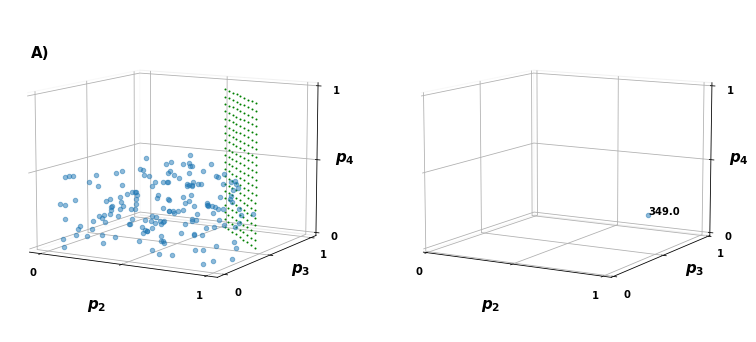

In [191]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq_memone[eq_memone['ID'] == 349][['ID', 'p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        
        ax2.text(row['p2'], row['p5'], row['p6'], row['ID'])

ax2.set_zlim(0, 1);

for point in data:
     ax1.scatter(point[0],
                 point[1],
                 point[2],
                 s=1,
                 color='green')
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)




    

# for k, indices in enumerate([[Is931, Js931, Zs931]]):
    
#         Is, Js, Zs = indices
        
#         for i, j, z in zip(Is, Js, Zs):
            
#             ax1.scatter(xv[i, j, z],
#                             yv[i, j, z],
#                             zv[i, j, z],
#                             s=1,
#                             color=colors[k])
            
#         ax1.scatter(xv[i, j, z],
#                 yv[i, j, z],
#                 zv[i, j, z],
#                 s=1,
# #                 label=labels[k],
#                 color=colors[k])
    
# ax3.legend(custom_lines, ['Provably Nash',
#                           'Numerical Nash',
#                           'AllD', 'N6'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);

# plt.savefig("../static/two_bit_results.pdf", 
#             transparent=True,  bbox_inches='tight')

In [187]:
N931((1, 0.97084, 0.47691, 0.23619), 1, 1)

-0.266865082189119

In [183]:
eq_memone[eq_memone['ID'] == 349]

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p14,p15,p16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
0,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N0,1.0,0.472380,True,True,2,1
1,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N1,1.0,0.631928,True,True,2,1
2,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N2,1.0,0.639472,True,True,2,1
3,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N3,1.0,0.705228,True,True,2,1
4,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N4,1.0,0.472380,True,True,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N65531,1.0,1.000000,True,True,2,1
65532,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N65532,1.0,1.000000,True,True,2,1
65533,349,1,0.97084,1,0.97084,0.47691,0.23619,0.47691,0.23619,1,...,0.23619,0.47691,0.23619,N65533,1.0,1.000000,True,True,2,1


In [254]:
x = np.arange(0, 1 - 10 ** -5, 0.03)
y = np.arange(0, 1 - 10 ** -5, 0.03)
z = np.arange(0, 1 - 10 ** -5, 0.03)



In [255]:
data = []

coplayer = deterministic_strategies[65331]

for i in tqdm.tqdm_notebook(x):
    for j in y:
        for k in z:
            p = (1, i, 1, i, j, k, j, k, 1, i, 1, i, j, k, j, k)
            
            M = calculate_M_memory_two(coplayer, p)
            
            
            ss = invariant_distribution(M)


            score = ss @ np.array([2 - 1, -1, 2, 0] * 4)
            
            if np.isclose(score, 2 - 1, atol=10 ** - 3):
                data.append((i, j, k))
            

<ipython-input-255-ac42e54caa35>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(x):


In [28]:
groups = noneq_memone[noneq_memone['condition A'] == False].groupby('ID')

In [252]:
len(deterministic_strategies)

65536

In [253]:
deterministic_strategies[65331]

(1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)

In [29]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [144]:
[s for s in sets if 'N0' not in s]

[array(['N8261', 'N8263', 'N8269', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N1', 'N2', 'N3', ..., 'N65329', 'N65330', 'N65331'], dtype=object),
 array(['N8771', 'N8775', 'N8779', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N8833', 'N8834', 'N8835', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N1', 'N2', 'N3', ..., 'N65329', 'N65330', 'N65331'], dtype=object),
 array(['N8261', 'N8263', 'N8269', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N563', 'N567', 'N571', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N560', 'N561', 'N562', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N33', 'N34', 'N35', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N8896', 'N8897', 'N8898', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N8261', 'N8263', 'N8269', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N16', 'N17',

In [ ]:
labels = [f"N{i}" for i in range(0, len(deterministic_strategies))]

idx_sets = []

for i, j in list(itertools.combinations(labels, r=2)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j))

In [110]:
sets

[array(['N0', 'N1', 'N2', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N2', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65228', 'N65292', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N2', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65228', 'N65280', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N8261', 'N8263', 'N8269', ..., 'N65329', 'N65330', 'N65331'],
       dtype=object),
 array(['N1', 'N2', 'N3', ..., 'N65329', 'N65330', 'N65331'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65228', 'N65472', 'N65484'], dtype=object),
 array(['N0', 'N1', 'N4', ..., 'N65224', 'N65228', 'N65484'], dtype=object),
 array(['N0', 'N4', 'N8', ..., 'N65228', 'N65280', 'N65484']

In [17]:
dfs = [pd.read_csv(file, index_col=0, names=columns2).tail(1) for file in files]

In [18]:
temp = pd.concat(dfs)

In [19]:
player_cols = [f"p{i+1}" for i in range(16)]

In [21]:
temp[player_cols].drop_duplicates().reset_index()

,,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16
0,65535,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342
1,65535,1,0.34614,1,0.34614,0.14481,0.65234,0.14481,0.65234,1,0.34614,1,0.34614,0.14481,0.65234,0.14481,0.65234
2,65535,1,0.83210,1,0.83210,0.98703,0.48692,0.98703,0.48692,1,0.83210,1,0.83210,0.98703,0.48692,0.98703,0.48692
3,65535,1,0.11253,1,0.11253,0.10030,0.07621,0.10030,0.07621,1,0.11253,1,0.11253,0.10030,0.07621,0.10030,0.07621
4,65535,1,0.28104,1,0.28104,0.55079,0.81089,0.55079,0.81089,1,0.28104,1,0.28104,0.55079,0.81089,0.55079,0.81089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,65535,1,0.86875,1,0.86875,0.92588,0.48841,0.92588,0.48841,1,0.86875,1,0.86875,0.92588,0.48841,0.92588,0.48841
396,65535,1,0.82504,1,0.82504,0.34164,0.73964,0.34164,0.73964,1,0.82504,1,0.82504,0.34164,0.73964,0.34164,0.73964
397,65535,1,0.08219,1,0.08219,0.05370,0.46565,0.05370,0.46565,1,0.08219,1,0.08219,0.05370,0.46565,0.05370,0.46565
398,65535,1,0.47409,1,0.47409,0.44826,0.29268,0.44826,0.29268,1,0.47409,1,0.47409,0.44826,0.29268,0.44826,0.29268


In [ ]:
for coplayer in 

In [24]:
counter_dic = Counter(flat_list)

In [25]:
list(counter_dic.keys())[list(counter_dic.values()).index(205)]

'N0'

In [142]:
to_check = []
for key, value in zip(counter_dic.keys(), counter_dic.values()):
    if value == 182:
        to_check.append(key)

In [143]:
len(to_check)

170

In [144]:
int(to_check[0].split("N")[-1])

13

In [35]:
dimensions = 2

deterministic_strategies = list(
    itertools.product([0, 1], repeat=2 ** (2 * dimensions))
)

In [113]:
coplayer = deterministic_strategies[8261]

In [116]:
coplayer

(0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1)

In [118]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

p_1 = 1

b, c = sym.symbols("b, c")

M = calculate_M_memory_two(coplayer, np.random.random(16))

ss = invariant_distribution(M)


# score = (ss @ sym.Matrix([b - c, -c, b, 0] * 4))[0].factor()

# score

In [120]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

p_1 = 1

b, c = sym.symbols("b, c")

M = calculate_M_memory_two(coplayer, [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
                                      p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4], analytical=True)

ss = invariant_distribution_analytically(M)


# score = (ss @ sym.Matrix([b - c, -c, b, 0] * 4))[0].factor()

In [124]:
score = (ss @ sym.Matrix([2 - 1, -1, 2, 0] * 4))[0].factor()

In [129]:
sym.init_printing(False)

score

(2*p_2**2*p_3**2*p_4 - 2*p_2**2*p_3*p_4 - 2*p_2*p_3**2*p_4**2 - 2*p_2*p_3**2*p_4 + 3*p_2*p_3*p_4**2 + 2*p_2*p_3*p_4 + p_2*p_3 - 2*p_2*p_4**2 + 2*p_2*p_4 - 2*p_2 + 2*p_3**2*p_4**2 + p_3*p_4**3 - 8*p_3*p_4**2 + 7*p_3*p_4 - 2*p_3 - p_4**3 + 4*p_4**2 - 3*p_4)/(p_2**2*p_3**2 - p_2**2*p_3 - p_2*p_3**2*p_4 - p_2*p_3**2 + p_2*p_3*p_4**2 - p_2*p_3*p_4 + 3*p_2*p_3 - p_2 + p_3**2*p_4 - p_3*p_4**3 + 3*p_3*p_4**2 - 5*p_3*p_4 + 2*p_3 + p_4**3 - 6*p_4**2 + 10*p_4 - 5)

In [125]:
score.factor()

(2*p_2**2*p_3**2*p_4 - 2*p_2**2*p_3*p_4 - 2*p_2*p_3**2*p_4**2 - 2*p_2*p_3**2*p_4 + 3*p_2*p_3*p_4**2 + 2*p_2*p_3*p_4 + p_2*p_3 - 2*p_2*p_4**2 + 2*p_2*p_4 - 2*p_2 + 2*p_3**2*p_4**2 + p_3*p_4**3 - 8*p_3*p_4**2 + 7*p_3*p_4 - 2*p_3 - p_4**3 + 4*p_4**2 - 3*p_4)/(p_2**2*p_3**2 - p_2**2*p_3 - p_2*p_3**2*p_4 - p_2*p_3**2 + p_2*p_3*p_4**2 - p_2*p_3*p_4 + 3*p_2*p_3 - p_2 + p_3**2*p_4 - p_3*p_4**3 + 3*p_3*p_4**2 - 5*p_3*p_4 + 2*p_3 + p_4**3 - 6*p_4**2 + 10*p_4 - 5)

In [107]:
size = M.shape[1]
pi = sym.symbols(f"b_1:{size + 1}")

In [108]:
ss = sym.solve(
    [sum(pi) - 1]
    + [a - b for a, b in zip(M.transpose() * sym.Matrix(pi), pi)],
    pi,
)

In [109]:
ss

{b_16: 0,
 b_15: 0,
 b_13: -b_14*p_2/(p_2 - 1),
 b_12: 0,
 b_11: 0,
 b_10: -b_14*p_3/(p_3 - 1),
 b_9: b_14*p_2*p_3/(p_2*p_3 - p_2 - p_3 + 1),
 b_8: b_14,
 b_7: -b_14*p_3/(p_3 - 1),
 b_6: 0,
 b_4: -b_14*p_2/(p_2 - 1),
 b_3: b_14*p_2*p_3/(p_2*p_3 - p_2 - p_3 + 1),
 b_2: 0,
 b_5: 0,
 b_1: (-2*b_14 + p_2*p_3 - p_2 - p_3 + 1)/(p_2*p_3 - p_2 - p_3 + 1)}

In [52]:
ss[pi[13]]

KeyError: b_14

In [55]:
sym.solve(
        [sum(pi) - 1]
        + [a - b for a, b in zip(M.transpose() * sym.Matrix(pi[13]), pi[13])], pi[13])

TypeError: 
Data type not understood; expecting list of lists or lists of values.

In [ ]:

    ss = sym.solve(
        [sum(pi) - 1]
        + [a - b for a, b in zip(M.transpose() * sym.Matrix(pi), pi)],
        pi,
    )

    v_vector = sym.Matrix(
        [
            [ss[p] for p in pi],
        ]
    )

    return v_vector

In [42]:
invariant_distribution_analytically(M)

KeyError: b_14

In [193]:
sym.init_printing(False)

score.subs({b:2, c:1, p_1:1}).factor()

2*(p_2*p_4 - p_2 - p_3*p_4**2 + 2*p_3*p_4 - p_3 - p_4**3 + 2*p_4**2 - 2*p_4)/(p_2*p_4 - p_2 - 4*p_4**2 + 8*p_4 - 5)

In [122]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

b, c = sym.symbols("b, c")

scores = []

for label in tqdm.tqdm_notebook(to_check):
    
    index = int(label.split("N")[-1])
    
    coplayer = deterministic_strategies[index]
    
    M = calculate_M_memory_two(coplayer, [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
                                          p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4])

    ss = invariant_distribution_analytically(M)


    score = (ss @ sym.Matrix([b - c, -c, b, 0] * 4))[0].factor()
    
    in_ = False
    
    for old in scores:
        if (score - old) == 0:
            in_ = True
            break
    
    if in_ == False:
        scores.append(score)
    

<ipython-input-122-da6954f537a9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for label in tqdm.tqdm_notebook(to_check):


KeyboardInterrupt: 

In [121]:
scores

[b*p_4]

In [ ]:
scores

In [112]:
values =  list(set(Counter(flat_list).values()))

In [113]:
values.sort()

In [116]:
values[-5:]

[180, 181, 182, 186, 205]

In [117]:
to_check = []
for key, value in zip(counter_dic.keys(), counter_dic.values()):
    if value == 186:
        to_check.append(key)

In [118]:
to_check

['N53504',
 'N53568',
 'N53632',
 'N53696',
 'N54528',
 'N54592',
 'N54656',
 'N54720',
 'N55552',
 'N55616',
 'N55680',
 'N55744',
 'N56576',
 'N56640',
 'N56704',
 'N56768']

In [98]:
M = calculate_M_memory_two([0, 0, 0, 0] * 4 ,[p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
                                             p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4])

In [99]:
ss = invariant_distribution_analytically(M)

In [100]:
(ss @ sym.Matrix([b - c, -c, b, 0] * 4))[0].factor()

b*p_4

In [92]:
M = transition_matrix([0, 0, 0, 0],[p_1, p_2, p_3, p_4], bits=4, analytical=True)

In [93]:
ss = invariant_distribution_analytically(M)

In [94]:
(ss @ sym.Matrix([b - c, -c, b, 0] * 4))[0].factor()

b*p_4

In [12]:
nash_fails = []

for file in tqdm.tqdm_notebook(files):
    temp = pd.read_csv(file, index_col=0, names=columns2)
    
    nash_fails.append(list(temp[temp['condition A'] == False]['label'].values))

<ipython-input-12-9c00a2ba7d9f>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm.tqdm_notebook(files):


In [207]:
'N0' not in nash_fails[0]

False

In [209]:
others = [s for s in nash_fails if 'N0' not in s]

In [223]:
flat_list = [item for sublist in others for item in sublist]

In [216]:
max(Counter(flat_list).values())

25

In [225]:
to_check = []
for key, value in zip(Counter(flat_list).keys(), Counter(flat_list).values()):
    if value == 25:
        to_check.append(key)

In [226]:
to_check

['N8897',
 'N8898',
 'N8899',
 'N8901',
 'N8902',
 'N8903',
 'N8905',
 'N8906',
 'N8907',
 'N8909',
 'N8910',
 'N8911',
 'N8912',
 'N8913',
 'N8914',
 'N8915',
 'N8916',
 'N8917',
 'N8918',
 'N8919',
 'N8920',
 'N8921',
 'N8922',
 'N8923',
 'N8924',
 'N8925',
 'N8926',
 'N8927',
 'N8928',
 'N8929',
 'N8930',
 'N8931',
 'N8932',
 'N8933',
 'N8934',
 'N8935',
 'N8936',
 'N8937',
 'N8938',
 'N8939',
 'N8940',
 'N8941',
 'N8942',
 'N8943',
 'N8944',
 'N8945',
 'N8946',
 'N8947',
 'N8948',
 'N8949',
 'N8950',
 'N8951',
 'N8952',
 'N8953',
 'N8954',
 'N8955',
 'N8956',
 'N8957',
 'N8958',
 'N8959',
 'N9089',
 'N9091',
 'N9093',
 'N9095',
 'N9097',
 'N9098',
 'N9099',
 'N9101',
 'N9102',
 'N9103',
 'N9105',
 'N9107',
 'N9109',
 'N9111',
 'N9112',
 'N9113',
 'N9114',
 'N9115',
 'N9116',
 'N9117',
 'N9118',
 'N9119',
 'N9121',
 'N9123',
 'N9125',
 'N9127',
 'N9128',
 'N9129',
 'N9130',
 'N9131',
 'N9132',
 'N9133',
 'N9134',
 'N9135',
 'N9137',
 'N9139',
 'N9141',
 'N9143',
 'N9144',
 'N9145',


In [221]:
len(others)

195

In [224]:
max(Counter(flat_list).values())

25

In [184]:
dfs = [pd.read_csv(file, index_col=0, names=columns2).tail(1) for file in files]

df2 = pd.concat(dfs)

In [185]:
df2['ID'].nunique()

1000

In [188]:
Counter(df2[df2['ID'] <= 100]['label'])

Counter({'N65535': 49,
 'N0': 44,
 'N931': 1,
 'N547': 1,
 'N8771': 1,
 'N33': 1,
 'N8833': 1,
 'N1': 1,
 'N8261': 1,
 'N8258': 1})

In [190]:
player = [1, 0.19705, 1, 0.19705, 0.45986, 0.04461, 0.45986, 0.04461, 1, 0.19705, 1, 0.19705, 0.45986, 0.04461, 0.45986, 0.04461]

In [191]:
def match_payoff(player, coplayer, Sx):
    
    M = calculate_M_memory_two(player, coplayer)
    ss = invariant_distribution(M)

    return ss @ Sx


In [194]:
labels = [f"N{i}" for i, _ in enumerate(deterministic_strategies)]

In [210]:
Sx = np.array([2, -1, 3, 0] * 4)

In [213]:
strategy = player 

sx = match_payoff(strategy, strategy, Sx)
data = []

for label, coplayer in zip(labels, deterministic_strategies):

    sy = match_payoff(coplayer, strategy, Sx)
    A = np.isclose(sx, sy, atol=10 ** -4) or sx > sy

    data_point = [
        A,
        label,
    ]
    data.append(data_point)

In [214]:
data[-1]

[True, 'N65535']

In [174]:
player_cols = [f"p{i+1}" for i in range(16)]

In [177]:
df2[player_cols].drop_duplicates().reset_index()

,,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16
0,65535,1,0.19705,1,0.19705,0.45986,0.04461,0.45986,0.04461,1,0.19705,1,0.19705,0.45986,0.04461,0.45986,0.04461
1,65535,1,0.29008,1,0.29008,0.61802,0.42877,0.61802,0.42877,1,0.29008,1,0.29008,0.61802,0.42877,0.61802,0.42877
2,65535,1,0.09610,1,0.09610,0.97646,0.46865,0.97646,0.46865,1,0.09610,1,0.09610,0.97646,0.46865,0.97646,0.46865
3,65535,1,0.56843,1,0.56843,0.01879,0.61764,0.01879,0.61764,1,0.56843,1,0.56843,0.01879,0.61764,0.01879,0.61764
4,65535,1,0.64589,1,0.64589,0.43759,0.89177,0.43759,0.89177,1,0.64589,1,0.64589,0.43759,0.89177,0.43759,0.89177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65535,1,0.60485,1,0.60485,0.73926,0.03919,0.73926,0.03919,1,0.60485,1,0.60485,0.73926,0.03919,0.73926,0.03919
96,65535,1,0.25436,1,0.25436,0.05803,0.43442,0.05803,0.43442,1,0.25436,1,0.25436,0.05803,0.43442,0.05803,0.43442
97,65535,1,0.12886,1,0.12886,0.39268,0.95641,0.39268,0.95641,1,0.12886,1,0.12886,0.39268,0.95641,0.39268,0.95641
98,65535,1,0.48563,1,0.48563,0.97750,0.87651,0.97750,0.87651,1,0.48563,1,0.48563,0.97750,0.87651,0.97750,0.87651


In [215]:
df2

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p14,p15,p16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
0,285,1,0.39232,1,0.39232,0.22122,0.68373,0.22122,0.68373,1,...,0.68373,0.22122,0.68373,N0,1.0,1.36746,False,False,2,1
65535,828,1,0.45125,1,0.45125,0.97966,0.18957,0.97966,0.18957,1,...,0.18957,0.97966,0.18957,N65535,1.0,1.00000,True,True,2,1
65535,937,1,0.59502,1,0.59502,0.89063,0.30660,0.89063,0.30660,1,...,0.30660,0.89063,0.30660,N65535,1.0,1.00000,True,True,2,1
65535,980,1,0.74744,1,0.74744,0.18791,0.15224,0.18791,0.15224,1,...,0.15224,0.18791,0.15224,N65535,1.0,1.00000,True,True,2,1
65535,232,1,0.21687,1,0.21687,0.90315,0.04292,0.90315,0.04292,1,...,0.04292,0.90315,0.04292,N65535,1.0,1.00000,True,True,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,870,1,0.13253,1,0.13253,0.85142,0.78172,0.85142,0.78172,1,...,0.78172,0.85142,0.78172,N0,1.0,1.56344,False,False,2,1
65535,163,1,0.16903,1,0.16903,0.85958,0.05853,0.85958,0.05853,1,...,0.05853,0.85958,0.05853,N65535,1.0,1.00000,True,True,2,1
65535,646,1,0.80215,1,0.80215,0.32291,0.34575,0.32291,0.34575,1,...,0.34575,0.32291,0.34575,N65535,1.0,1.00000,True,True,2,1


In [150]:
len(deterministic_strategies)

65536

In [152]:
Counter(df2['label'])

Counter({'N65535': 841})

In [121]:
eq_memone, noneq_memone = seperate_equilibria_and_non(df2)

In [174]:
Is931, Js931, Zs931 = np.where(np.isclose(N931((1, xv, yv, zv)), 0, atol=10 ** - 3))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [175]:
xv, yv, zv

(array([[[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
         [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
         [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
         [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
         [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
         [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
         [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
         [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]],
 
        [[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
         [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
         [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
         [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
         [0.6, 0.6, 0

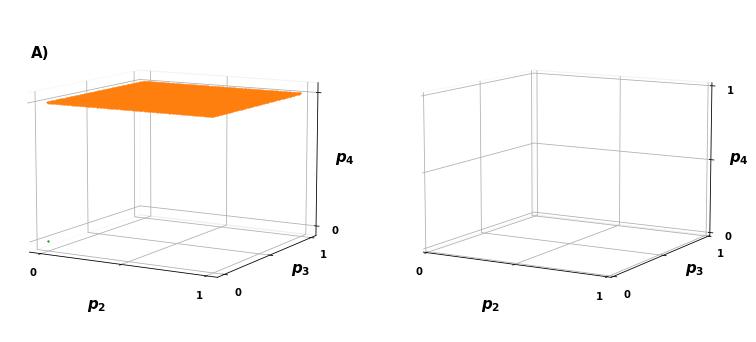

In [203]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]



# for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

#         ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

# ax1.set_zlim(0, 1);
        
    
# for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

#         ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

# ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)


for k, indices in enumerate([[Is0, Js0, Zs0],
                             [Is931, Js931, Zs931]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax1.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax1.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
#                 label=labels[k],
                color=colors[k])
    
# ax3.legend(custom_lines, ['Provably Nash',
#                           'Numerical Nash',
#                           'AllD', 'N6'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);

# plt.savefig("../static/two_bit_results.pdf", 
#             transparent=True,  bbox_inches='tight')

In [69]:
eq['ID'].nunique()

499

In [85]:
to_ckeck = list(set(eq['ID']).difference(set(eq_memone['ID'])))

In [87]:
eq[eq['ID'] == i].iloc[-1]['label']

'N15'

In [89]:
max([noneq_memone[noneq_memone['ID'] == i].iloc[-1]['label'] for i in to_ckeck])

'N931'

In [94]:
N931 = deterministic_strategies[931]

In [107]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

M = calculate_M_memory_two(N931,[p_1, p_2, p_3, p_4] * 4)

ss = invariant_distribution_analytically(M)


ss @ sym.Matrix([b - c, -c, b, 0] * 4)

In [108]:
b, c = sym.symbols("b, c")

In [109]:
exprN931 = ss @ sym.Matrix([b - c, -c, b, 0] * 4)

In [114]:
sym.init_printing(False)

In [115]:
(exprN931[0] - (b - c)).subs({p_1:1, b:2, c: 1}).simplify()

(-p_2**2*p_3 + 3*p_2**2*p_4 - 3*p_2**2 + p_2*p_3*p_4 + p_2*p_3 - p_2*p_4**2 - 3*p_2*p_4 + p_3*p_4 - 2*p_3 + p_4**2 - 2*p_4 + 3)/(p_2**2*p_3 + p_2**2*p_4**2 - 3*p_2**2*p_4 + 2*p_2**2 - 5*p_2*p_3 + p_2*p_4**2 + p_2*p_4 + 4*p_3*p_4 - 2*p_4**2 - 2*p_4 - 2)

In [64]:
eq_memone.tail()

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p14,p15,p16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
65531,450,1,0.29362,1,0.29362,0.9682,0.2262,0.9682,0.2262,1,...,0.2262,0.9682,0.2262,N65531,1.0,1.0,True,True,2,1
65532,450,1,0.29362,1,0.29362,0.9682,0.2262,0.9682,0.2262,1,...,0.2262,0.9682,0.2262,N65532,1.0,1.0,True,True,2,1
65533,450,1,0.29362,1,0.29362,0.9682,0.2262,0.9682,0.2262,1,...,0.2262,0.9682,0.2262,N65533,1.0,1.0,True,True,2,1
65534,450,1,0.29362,1,0.29362,0.9682,0.2262,0.9682,0.2262,1,...,0.2262,0.9682,0.2262,N65534,1.0,1.0,True,True,2,1
65535,450,1,0.29362,1,0.29362,0.9682,0.2262,0.9682,0.2262,1,...,0.2262,0.9682,0.2262,N65535,1.0,1.0,True,True,2,1


### Results for the pd

In [ ]:
import glob

columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

files = glob.glob("../two_bit_reactive_pd/*csv")

dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

df.to_csv("../two_bit_reactive_nash_pd.csv")

In [ ]:
pd_df = pd.read_csv("../two_bit_reactive_nash_pd.csv", index_col=0)

In [ ]:
eq, noneq = seperate_equilibria_and_non(pd_df)

In [ ]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [ ]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [ ]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [ ]:
counter

In [ ]:
idx_sets = []

for i, j, k in list(itertools.combinations(labels, r=3)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s) and k not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j, k))

In [ ]:
idx_sets

In [ ]:
[(i, s) for i, s in zip(ids, sets) if 'N7' not in s and 'N0' not in s and 'N6' not in s]

In [4]:
import sympy as sym

In [5]:
p_2, p_3, b, c = sym.symbols("p_2, p_3, b, c")

In [16]:
sym.solve(p_2 + p_3 - (1 + (b - c) / b), p_3)[0].simplify()

-p_2 + 2 - c/b